In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm
from scipy import stats

In [2]:
WineData = pd.read_csv('WineData.csv')
WineData.head()

,ID,Brand,FA,VA,CA,RS,chloride,FSD,TSD,density,pH,sulphate,alcohol
0,1,Seagram,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,2,Seagram,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,3,Seagram,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,4,Sula Vineyards,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,Seagram,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [3]:
WineData.shape

(1599, 13)

In [4]:
WineData.columns

Index(['ID', 'Brand', 'FA', 'VA', 'CA', 'RS', 'chloride', 'FSD', 'TSD',
       'density', 'pH', 'sulphate', 'alcohol'],
      dtype='object')

In [5]:
WineData[WineData.columns[2:13]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FA,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
VA,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
CA,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
RS,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chloride,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
FSD,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
TSD,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphate,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
WineData['Brand'].value_counts()

Seagram           633
Sula Vineyards    553
Grover Zampa      413
Name: Brand, dtype: int64

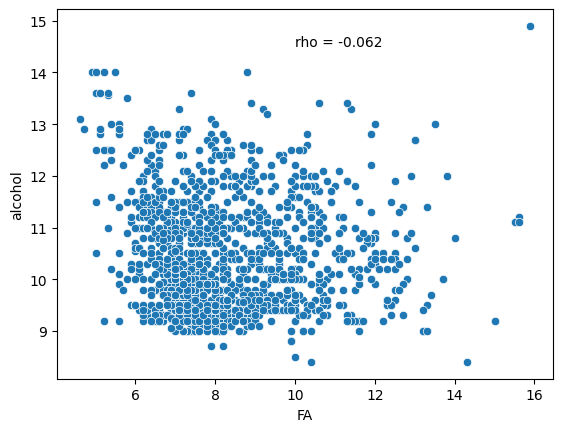

In [7]:
g = sns.scatterplot(data=WineData, x='FA', y='alcohol')
r = np.round(pearsonr(WineData['FA'],WineData['alcohol'])[0],3)
g.text(x=10, y=14.5, s='rho = '+str(r))
plt.show()

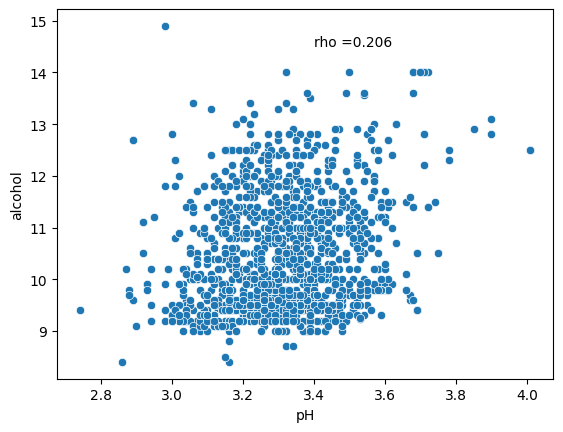

In [8]:
g = sns.scatterplot(data=WineData, x='pH', y='alcohol')
r = np.round(pearsonr(WineData['pH'],WineData['alcohol'])[0],3)
g.text(x=3.4, y=14.5, s='rho ='+str(r))
plt.show()

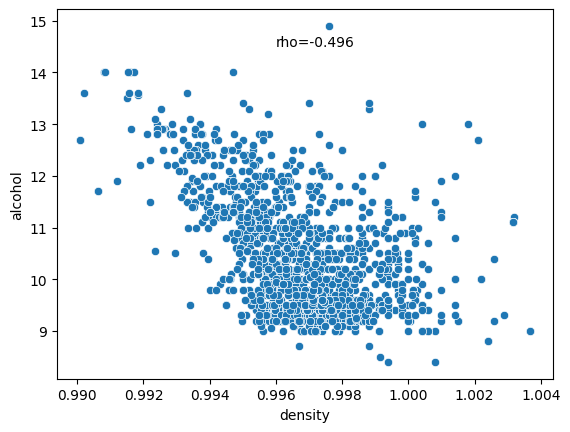

In [9]:
g=sns.scatterplot(data=WineData, x='density', y='alcohol')
r = np.round(pearsonr(WineData['density'],WineData['alcohol'])[0],3)
g.text(x=0.996, y=14.5, s='rho='+str(r))
plt.show()

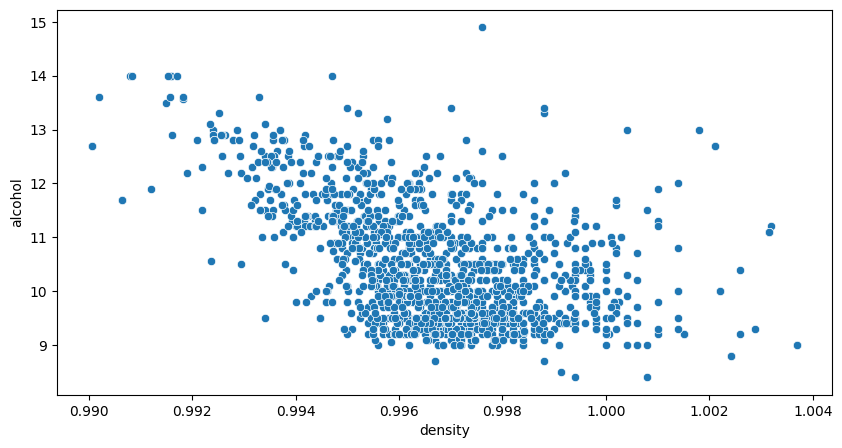

In [10]:
a4_dims = (10,5)
fig, ax = plt.subplots(figsize=a4_dims)
a = sns.scatterplot(data=WineData, x='density',y='alcohol')
plt.show()

In [11]:
mod=ols('alcohol ~ density', data=WineData).fit()
intercept, density_slope = mod.params
equation = '\n Y={}'.format(round(density_slope,2))+'*X+'+' {}'.format(round(intercept,2))
print(equation)



 Y=-280.16*X+ 289.68


In [12]:
mod.params

Intercept    289.675343
density     -280.163823
dtype: float64

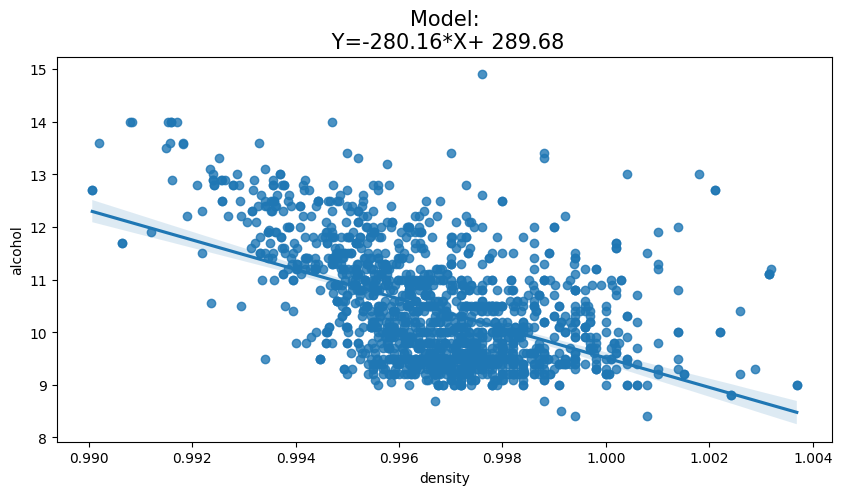

In [13]:
a4_dims=(10,5)
fig, ax=plt.subplots(figsize=a4_dims)
a=sns.regplot(x='density',y='alcohol',data=WineData)
a.set_title('Model:'+equation, fontsize=15)
plt.show()

In [14]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     521.6
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          3.94e-100
Time:                        00:16:53   Log-Likelihood:                -2144.1
No. Observations:                1599   AIC:                             4292.
Df Residuals:                    1597   BIC:                             4303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    289.6753     12.227     23.691      0.0

C:\Users\timry\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


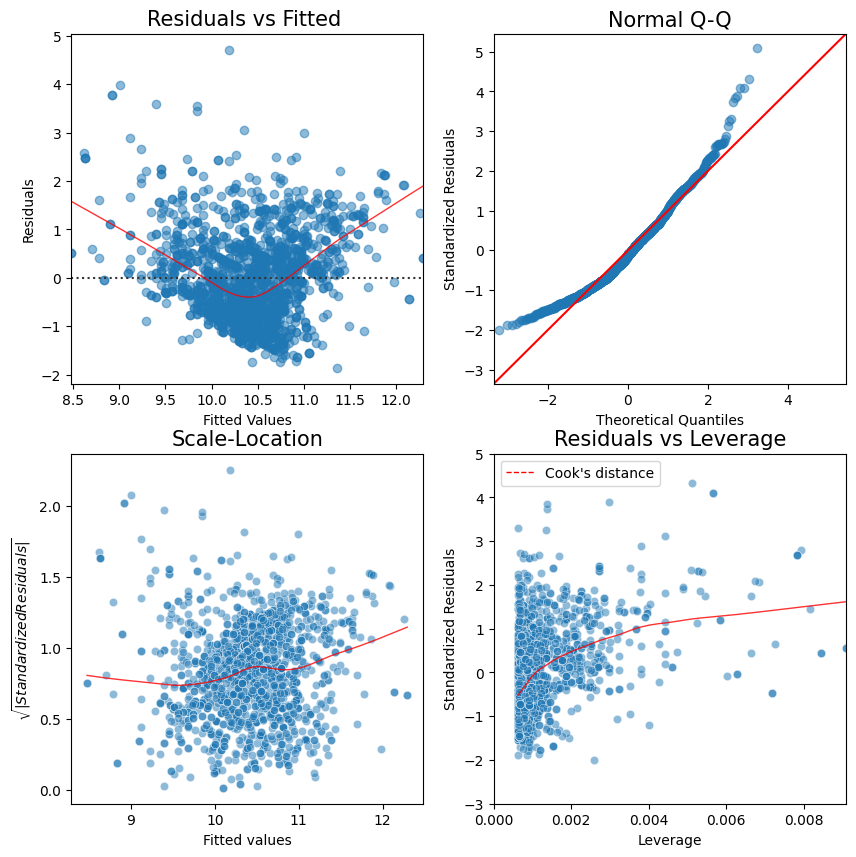

In [15]:
# Residual plot
def regression_plots(model,data):
 # model values
 model_fitted_y = model.fittedvalues
 # model residuals
 model_residuals = model.resid
 # normalized residuals
 model_norm_residuals = model.get_influence().resid_studentized_internal
 # absolute squared normalized residuals
 model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
 # absolute residuals
 model_abs_resid = np.abs(model_residuals)
 # leverage, from statsmodels internals
 model_leverage = model.get_influence().hat_matrix_diag
 # cook's distance, from statsmodels internals
 model_cooks = model.get_influence().cooks_distance[0]
 def graph(formula, x_range, label=None):
     x = x_range
     y = formula(x)
     plt.plot(x, y, label=label, lw=1, ls='--', color='red')
 ###################################################################
 fig, axes = plt.subplots(nrows=2,ncols=2)
 fig.set_size_inches(10, 10)
 a = sns.residplot(data=data, x=model_fitted_y, y=data['alcohol'], lowess=True,scatter_kws={'alpha': 0.5},
                   line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},ax=axes[0][0])
 a.set_title("Residuals vs Fitted ",fontsize=15)
 a.set_xlabel('Fitted Values')
 a.set_ylabel('Residuals')
 ###################################################################
 axes[0][1].set_title("Normal Q-Q",fontsize=15)
 QQ = ProbPlot(model_norm_residuals)
 b = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1,ax=axes[0][1],ylabel = 'Standardized Residuals')
 ###################################################################
 c= sns.scatterplot(data=data, x=model_fitted_y, y=model_norm_residuals_abs_sqrt, alpha=0.5,ax=axes[1][0])
 sns.regplot(data=data, x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
             scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},ax=axes[1][0]);
 c.set_title('Scale-Location',fontsize=15)
 c.set_xlabel('Fitted values')
 c.set_ylabel('$\sqrt{|Standardized Residuals|}$');
 ###################################################################
 d= sns.scatterplot(data=data, x=model_leverage, y=model_norm_residuals, alpha=0.5,ax=axes[1][1]);
 sns.regplot(data=data, x=model_leverage, y=model_norm_residuals,
         scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},ax=axes[1][1]);
 d.set_xlim(0, max(model_leverage))
 d.set_ylim(-3, 5)
 d.set_title('Residuals vs Leverage',fontsize=15)
 d.set_xlabel('Leverage')
 d.set_ylabel('Standardized Residuals')
 p = len(model.params) # number of model parameters
 graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),np.linspace(0.001, 0.200, 50),'Cook\'s distance') # 0.5 line
 graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),np.linspace(0.001, 0.200, 50)) # 1 line
 d.legend()
 plt.show()
regression_plots(mod,WineData)

C:\Users\timry\AppData\Local\Temp\ipykernel_17924\1382022745.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=WineData[WineData.columns[1:13]].corr()


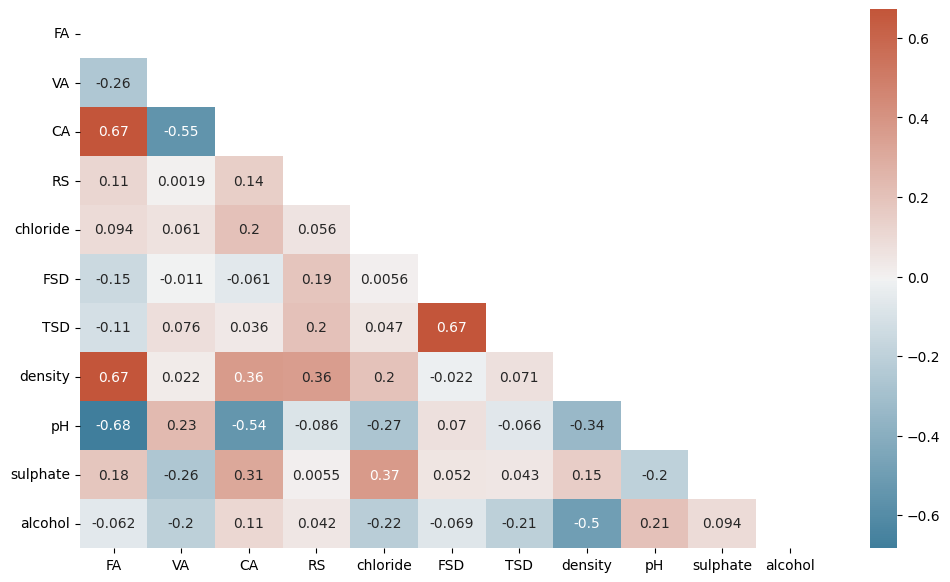

In [16]:
plt.figure(figsize=(12,7))
corr=WineData[WineData.columns[1:13]].corr()
cmap=sns.diverging_palette(230,20, as_cmap=True)
mask=np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap)
plt.show()

In [17]:
mod = ols('alcohol ~ FA+VA+CA+RS+chloride+FSD+TSD+density+sulphate+pH+Brand', data = WineData).fit()
coefficients = mod.params
print(coefficients)

Intercept                  585.744496
Brand[T.Seagram]            -0.235467
Brand[T.Sula Vineyards]     -0.002991
FA                           0.509555
VA                           0.423617
CA                           0.823537
RS                           0.272455
chloride                    -1.303246
FSD                         -0.002695
TSD                         -0.001520
density                   -595.004881
sulphate                     1.084578
pH                           3.617430
dtype: float64


In [18]:
df_new = pd.get_dummies(WineData, drop_first=True)
def vif_cal(input_data, dependent_cols):
    x_vars = input_data.drop([dependent_cols], axis=1)
    xvar_names = x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=ols(formula='y~x', data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print(xvar_names[i], 'VIF=', vif)
vif_cal(input_data = df_new.iloc[:,1:14], dependent_cols='alcohol')


FA VIF= 5.65
VA VIF= 1.79
CA VIF= 3.07
RS VIF= 1.31
chloride VIF= 1.48
FSD VIF= 1.98
TSD VIF= 2.24
density VIF= 2.91
pH VIF= 2.49
sulphate VIF= 1.4
Brand_Seagram VIF= 1.91
Brand_Sula Vineyards VIF= 1.59


In [19]:
mod2 = ols('alcohol ~ VA+CA+RS+chloride+FSD+TSD+density+sulphate+pH+Brand', data = WineData).fit()
coeff_MLR_wine2 = mod2.params
print(coeff_MLR_wine2)

Intercept                  364.757981
Brand[T.Seagram]            -0.416173
Brand[T.Sula Vineyards]     -0.066258
VA                           0.759100
CA                           2.454701
RS                           0.199998
chloride                    -4.397360
FSD                          0.002859
TSD                         -0.006540
density                   -361.063201
sulphate                     0.985574
pH                           1.257011
dtype: float64


In [20]:
vif_cal(input_data = df_new.iloc[:,2:14], dependent_cols='alcohol')

VA VIF= 1.77
CA VIF= 2.34
RS VIF= 1.23
chloride VIF= 1.32
FSD VIF= 1.96
TSD VIF= 2.04
density VIF= 1.51
pH VIF= 1.54
sulphate VIF= 1.39
Brand_Seagram VIF= 1.86
Brand_Sula Vineyards VIF= 1.58


In [21]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     181.0
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          1.05e-270
Time:                        00:16:55   Log-Likelihood:                -1720.1
No. Observations:                1599   AIC:                             3464.
Df Residuals:                    1587   BIC:                             3529.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [22]:
x= np.array([0])
new_brand = np.repeat(x, len(WineData),axis=0)
for i in range(len(WineData)):
    if(WineData.iloc[i,1]=='Seagram'):
        new_brand[i]=1
WineData['new_brand']=new_brand

In [23]:
WineData.head()

,ID,Brand,FA,VA,CA,RS,chloride,FSD,TSD,density,pH,sulphate,alcohol,new_brand
0,1,Seagram,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,2,Seagram,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,3,Seagram,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,4,Sula Vineyards,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,5,Seagram,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [24]:
MLR_new = ols('alcohol ~ VA+CA+RS+chloride+TSD+density+sulphate+pH+new_brand', data = WineData).fit()
print(MLR_new.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     220.7
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          2.31e-272
Time:                        00:16:55   Log-Likelihood:                -1721.7
No. Observations:                1599   AIC:                             3463.
Df Residuals:                    1589   BIC:                             3517.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    365.5364     11.582     31.560      0.0

In [25]:
coeff_MLR = MLR_new.params
print(coeff_MLR)

Intercept    365.536428
VA             0.744273
CA             2.453709
RS             0.202516
chloride      -4.416669
TSD           -0.005956
density     -361.953393
sulphate       1.006848
pH             1.280760
new_brand     -0.378445
dtype: float64


In [26]:
model_fitted_y = pd.DataFrame(mod.fittedvalues, columns=['Estimated'])
model_residuals = pd.DataFrame(mod.resid, columns=['Residual'])
d1 = pd.concat([WineData, model_fitted_y, model_residuals], axis=1, ignore_index=True)
d1.columns = ['ID','Brand','FA','VA','CA','RS','chloride','FSD','TSD','density','sulphate',
              'pH','alcohol','new_brand','Estimated','Residual']
d1.loc[[0,1,3,7,8,20], ['Brand','VA','CA','RS','chloride','TSD','density','sulphate',
                         'pH','alcohol','Estimated','Residual']]

,Brand,VA,CA,RS,chloride,TSD,density,sulphate,pH,alcohol,Estimated,Residual
0,Seagram,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,9.522213,-0.122213
1,Seagram,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,9.480172,0.319828
3,Sula Vineyards,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,10.556446,-0.756446
7,Grover Zampa,0.65,0.00,1.2,0.065,21.0,0.9946,3.39,0.47,10.0,10.890457,-0.890457
8,Grover Zampa,0.58,0.02,2.0,0.073,18.0,0.9968,3.36,0.57,9.5,10.051248,-0.551248
20,Sula Vineyards,0.22,0.48,1.8,0.077,60.0,0.9968,3.39,0.53,9.4,10.722759,-1.322759


C:\Users\timry\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


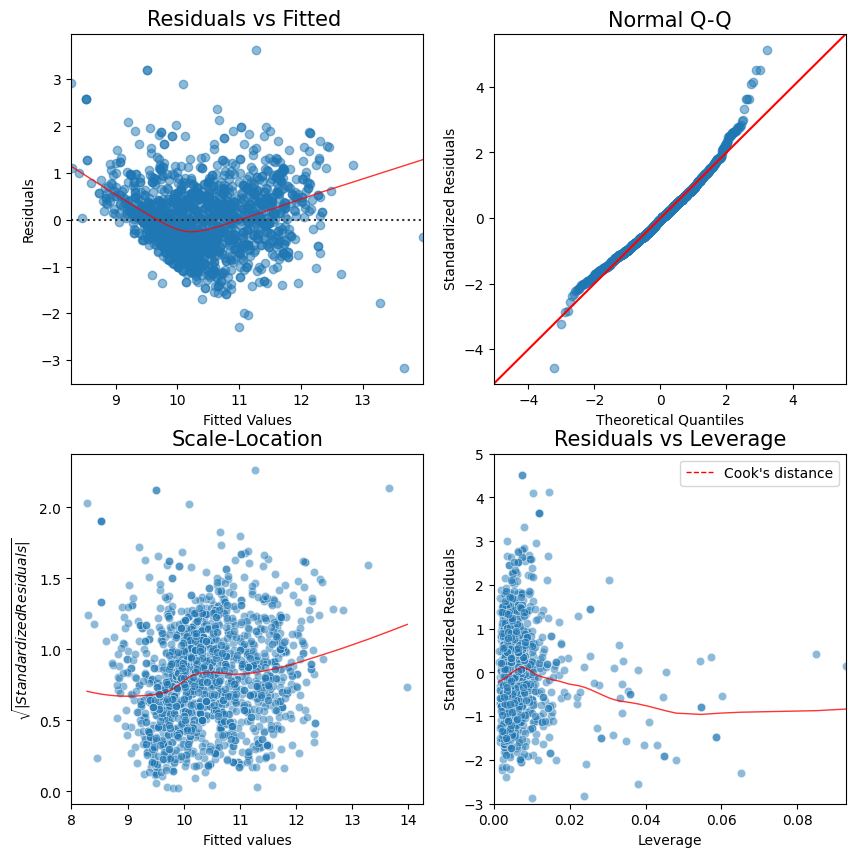

In [27]:
regression_plots(MLR_new, WineData)

In [28]:
vif_cal(input_data = WineData.iloc[:, 3:14], dependent_cols='alcohol')

VA VIF= 1.76
CA VIF= 2.32
RS VIF= 1.23
chloride VIF= 1.32
FSD VIF= 1.94
TSD VIF= 2.04
density VIF= 1.51
pH VIF= 1.54
sulphate VIF= 1.38
new_brand VIF= 1.24


Text(0, 0.5, 'log-likelihood')

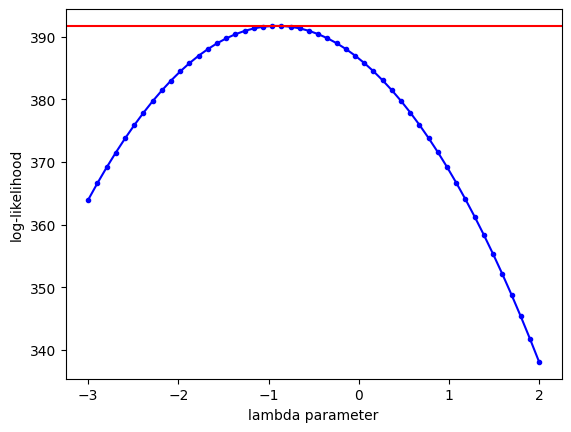

In [29]:
lmbdas = np.linspace(-3,2)
llf=np.zeros(lmbdas.shape, dtype=float)
for ii, lmbda in enumerate(lmbdas):
    llf[ii]=stats.boxcox_llf(lmbda, MLR_new.fittedvalues)

lmbda_optimal = llf.max()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lmbdas, llf, 'b.-')
ax.axhline(lmbda_optimal, color='r')
ax.set_xlabel('lambda parameter')
ax.set_ylabel('log-likelihood')



C:\Users\timry\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


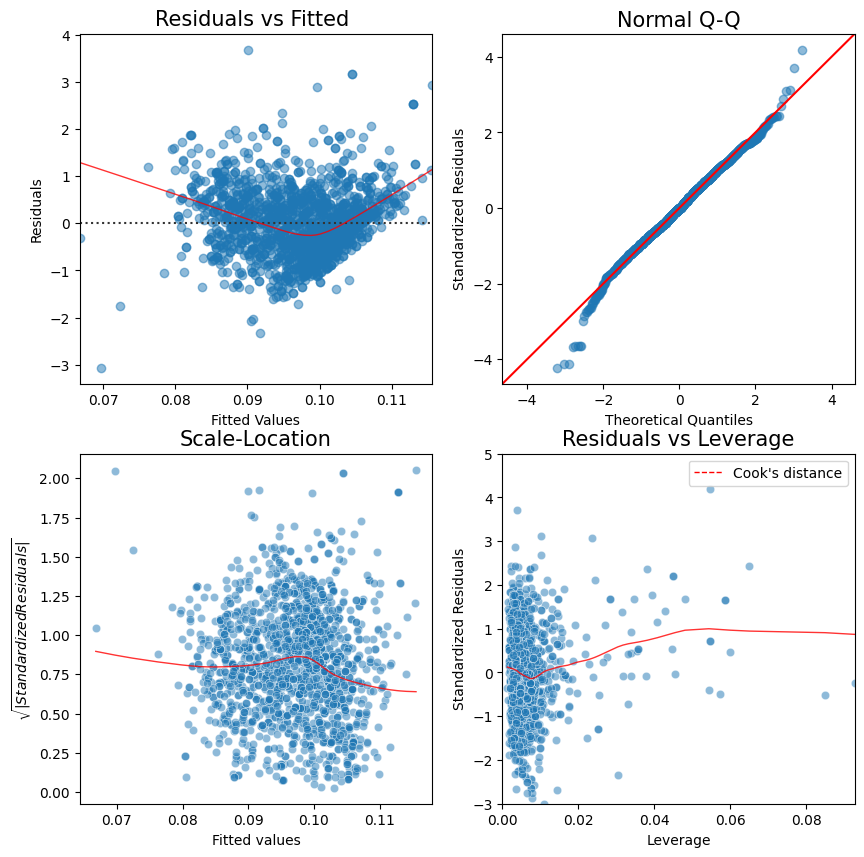

In [30]:
#lambda=-1 
new_resp1=1/WineData['alcohol']
WineData['new_resp'] = new_resp1
MLR_wine1 = ols(formula="new_resp ~ VA+CA+RS+chloride+TSD+density+sulphate+pH+new_brand",data=WineData).fit()
regression_plots(MLR_wine1, WineData)


C:\Users\timry\anaconda3\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


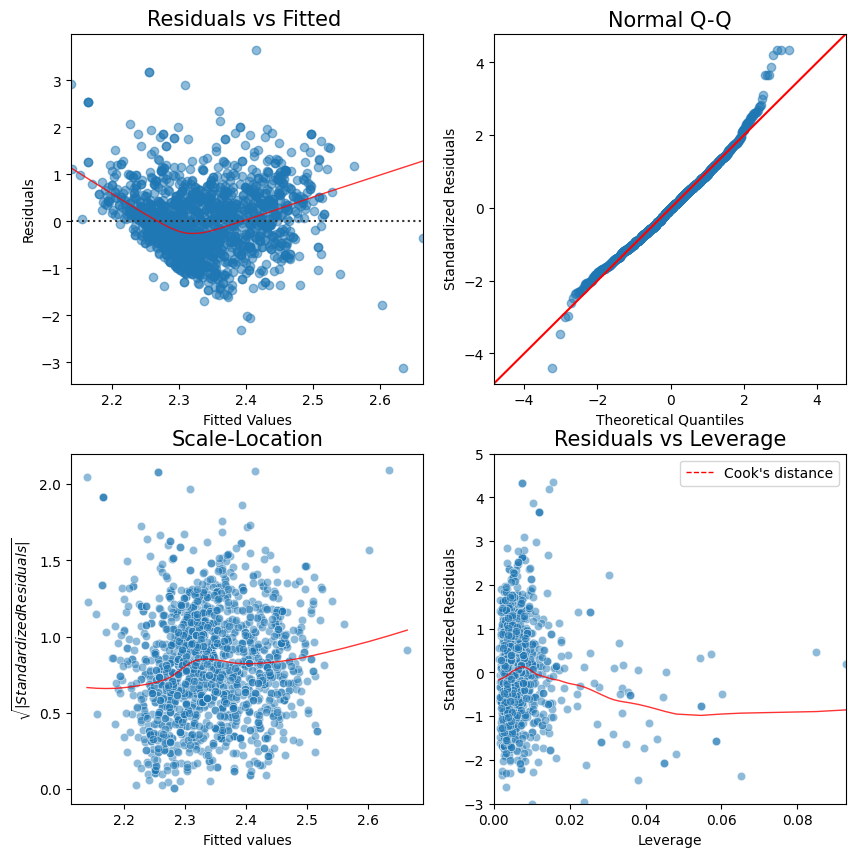

In [31]:
#lambda=0
new_resp2 = np.log(WineData['alcohol'])
WineData['new_resp'] = new_resp2
MLR_wine2 = ols(formula="new_resp ~ VA+CA+RS+chloride+TSD+density+sulphate+pH+new_brand",data=WineData).fit()
regression_plots(MLR_wine2, WineData)


In [32]:
#lambda=-1 
new_resp = 1/WineData['alcohol']
WineData['new_resp'] = new_resp
MLR_wine = ols(formula="new_resp ~ VA+CA+RS+chloride+TSD+density+sulphate+pH+new_brand",data=WineData).fit()
print(MLR_wine.summary())

                            OLS Regression Results                            
Dep. Variable:               new_resp   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     213.2
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          9.26e-266
Time:                        00:16:59   Log-Likelihood:                 5848.0
No. Observations:                1599   AIC:                        -1.168e+04
Df Residuals:                    1589   BIC:                        -1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8919      0.102    -28.402      0.0

In [33]:
# ANOVA table
aov_tbl = sm.stats.anova_lm(MLR_new)
print(aov_tbl)

               df      sum_sq     mean_sq            F         PR(>F)
VA            1.0   74.260974   74.260974   146.311486   2.773338e-32
CA            1.0    0.009037    0.009037     0.017805   8.938658e-01
RS            1.0    3.435694    3.435694     6.769121   9.361018e-03
chloride      1.0   86.123751   86.123751   169.683930   6.277644e-37
TSD           1.0   72.561124   72.561124   142.962383   1.300526e-31
density       1.0  620.963182  620.963182  1223.442687  3.003708e-199
sulphate      1.0   60.471165   60.471165   119.142337   8.482902e-27
pH            1.0   45.968786   45.968786    90.569259   6.367156e-21
new_brand     1.0   44.467580   44.467580    87.611532   2.622912e-20
Residual   1589.0  806.503244    0.507554          NaN            NaN
